In [6]:
#installing mlxtend
!pip install mlxtend

  Using cached mlxtend-0.23.4-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.4-py3-none-any.whl (1.4 MB)



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
#import laybraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [8]:
#import data
dataset = pd.read_excel("Egyptian_Grocery_Transactions.xlsx", header = None)
dataset.head() #showing top 5 rows

,0
0,"سكر,لبن,شاي"
1,"فراخ,بطاطس"
2,"رز,فراخ"
3,"عسل,لحمة,رز,زبادي"
4,"بصل,رز,عدس"


In [9]:
# giving the column name
dataset.columns= ["Items"]

In [10]:
dataset #presenting the data with Items column name

,Items
0,"سكر,لبن,شاي"
1,"فراخ,بطاطس"
2,"رز,فراخ"
3,"عسل,لحمة,رز,زبادي"
4,"بصل,رز,عدس"
5,"شيبسي,فلفل,بيبسي,مياه"
6,"فراخ,بطاطس,شيبسي"
7,"طماطم,عدس,كورن فليكس"
8,"عسل,مربة,زيت,عيش بلدي"
9,"فراخ,مكرونة,شاي,كشري,سكر,سمنة"


In [11]:
dataset.shape #showing numbers of rows and columns

(20, 1)

In [12]:
items = dataset['Items'].values #converting data into array

In [13]:
transaction = []
for i in range (0,len(dataset)):
    transaction.append(items[i].split(","))

In [14]:
encoder = TransactionEncoder()
encoded_data = encoder.fit_transform(transaction)

In [15]:
encoded_data

array([[False, False, False, False, False, False, False, False,  True,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False,  True,  True, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False,  True, False, False,
        False],
       [ True, False, False, False, False,  True, False, False, False,
        False

In [16]:
encodeddata_d = pd.DataFrame(encoded_data,columns = encoder.columns_)

In [17]:
encodeddata_d.head()

,بصل,بطاطس,بيبسي,بيض,جبنة قريش,رز,زبادي,زيت,سكر,سمنة,...,فراخ,فلفل,فول,كشري,كورن فليكس,لبن,لحمة,مربة,مكرونة,مياه
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
support = apriori(encodeddata_d,min_support =.1,use_colnames=True)
support.sort_values(by = 'support' ,ascending =False)

,support,itemsets
1,0.30,(بيبسي)
12,0.30,(عدس)
7,0.25,(سكر)
6,0.20,(زيت)
13,0.20,(عسل)
2,0.20,(بيض)
4,0.20,(رز)
15,0.20,(فراخ)
14,0.15,(عيش بلدي)
17,0.15,(كشري)


In [26]:
confidence = association_rules(support,metric='confidence',min_threshold=.3)
confidence.sort_values(by = "confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(بطاطس),(فراخ),0.1,0.20,0.1,1.000000,5.000000,1.0,0.080,inf,0.888889,0.500000,1.000000,0.750000
21,(فول),(بيض),0.1,0.20,0.1,1.000000,5.000000,1.0,0.080,inf,0.888889,0.500000,1.000000,0.750000
12,(جبنة قريش),(بيض),0.1,0.20,0.1,1.000000,5.000000,1.0,0.080,inf,0.888889,0.500000,1.000000,0.750000
9,(طعمية),(بيبسي),0.1,0.30,0.1,1.000000,3.333333,1.0,0.070,inf,0.777778,0.333333,1.000000,0.666667
76,"(بيبسي, عدس, زيت)",(بيض),0.1,0.20,0.1,1.000000,5.000000,1.0,0.080,inf,0.888889,0.500000,1.000000,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,(بيبسي),"(عدس, زيت)",0.3,0.10,0.1,0.333333,3.333333,1.0,0.070,1.350,1.000000,0.333333,0.259259,0.666667
66,(عدس),"(بيض, زيت)",0.3,0.15,0.1,0.333333,2.222222,1.0,0.055,1.275,0.785714,0.285714,0.215686,0.500000
60,(عدس),"(بيبسي, زيت)",0.3,0.10,0.1,0.333333,3.333333,1.0,0.070,1.350,1.000000,0.333333,0.259259,0.666667
84,(بيبسي),"(بيض, عدس, زيت)",0.3,0.10,0.1,0.333333,3.333333,1.0,0.070,1.350,1.000000,0.333333,0.259259,0.666667


In [30]:
import os
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

C:\Users\DELL\AppData\Local\Temp\ipykernel_21172\423273074.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


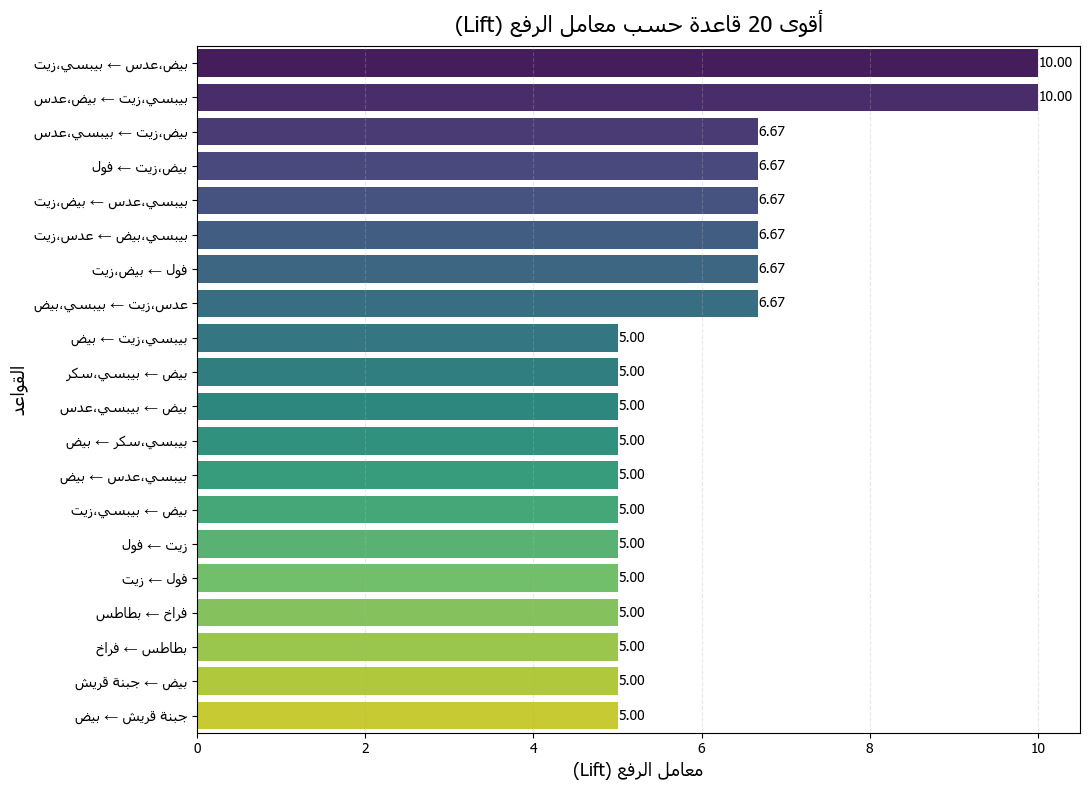

In [39]:
# Get top 20 rules sorted by LIFT
top_rules = confidence.sort_values(by='lift', ascending=False).head(20)

# Arabic reshaping function
def reshape_arabic_text(items):
    joined = "،".join(items)
    reshaped = arabic_reshaper.reshape(joined)
    return get_display(reshaped)

# Create rule labels in Arabic
rule_labels = [
    f"{reshape_arabic_text(row['antecedents'])} ← {reshape_arabic_text(row['consequents'])}"
    for _, row in top_rules.iterrows()
]

# Plot bar chart
plt.figure(figsize=(11, 8))
ax = sns.barplot(
    y=rule_labels,
    x=top_rules['lift'],
    palette='viridis'
)

# Add labels to bars
for i, (value, label) in enumerate(zip(top_rules['lift'], rule_labels)):
    ax.text(
        value + 0.01, i, f"{value:.2f}",
        va='center',
        fontsize=10,
        fontfamily='Tahoma'
    )

# Set titles and labels (in Arabic)
plt.title(get_display(arabic_reshaper.reshape("أقوى 20 قاعدة حسب معامل الرفع (Lift)")), fontsize=16, pad=10)
plt.xlabel(get_display(arabic_reshaper.reshape("معامل الرفع (Lift)")), fontsize=13)
plt.ylabel(get_display(arabic_reshaper.reshape("القواعد")), fontsize=13)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
